# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


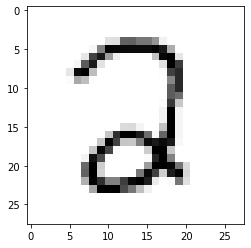

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2457
Training Accuracy: 0.6501, Testing Accuracy: 0.6552



Epoch 10, Loss 0.0988
Training Accuracy: 0.9037, Testing Accuracy: 0.9103



Epoch 20, Loss 0.0601
Training Accuracy: 0.9367, Testing Accuracy: 0.9456



Epoch 30, Loss 0.0459
Training Accuracy: 0.9486, Testing Accuracy: 0.9572



Epoch 40, Loss 0.039
Training Accuracy: 0.9555, Testing Accuracy: 0.9627



Epoch 50, Loss 0.035
Training Accuracy: 0.9595, Testing Accuracy: 0.9667



Epoch 60, Loss 0.0323
Training Accuracy: 0.9628, Testing Accuracy: 0.9672



Epoch 70, Loss 0.0303
Training Accuracy: 0.9654, Testing Accuracy: 0.9677



Epoch 80, Loss 0.0288
Training Accuracy: 0.9672, Testing Accuracy: 0.9693



Epoch 90, Loss 0.0275
Training Accuracy: 0.9683, Testing Accuracy: 0.9677



Epoch 100, Loss 0.0264
Training Accuracy: 0.9695, Testing Accuracy: 0.9677



Epoch 110, Loss 0.0255
Training Accuracy: 0.9705, Testing Accuracy: 0.9693



Epoch 120, Loss 0.0247
Training Accuracy: 0.9717, Testing Accuracy: 0.9693



Epoch 130, Loss 0.024
Training Accuracy: 0.9730, Testing Accuracy: 0.9698



Epoch 140, Loss 0.0233
Training Accuracy: 0.9735, Testing Accuracy: 0.9693



Epoch 150, Loss 0.0227
Training Accuracy: 0.9739, Testing Accuracy: 0.9693



Epoch 160, Loss 0.0221
Training Accuracy: 0.9745, Testing Accuracy: 0.9708



Epoch 170, Loss 0.0216
Training Accuracy: 0.9752, Testing Accuracy: 0.9713



Epoch 180, Loss 0.0211
Training Accuracy: 0.9758, Testing Accuracy: 0.9723



Epoch 190, Loss 0.0207
Training Accuracy: 0.9761, Testing Accuracy: 0.9723



Epoch 200, Loss 0.0202
Training Accuracy: 0.9770, Testing Accuracy: 0.9718



Epoch 210, Loss 0.0198
Training Accuracy: 0.9776, Testing Accuracy: 0.9728



Epoch 220, Loss 0.0194
Training Accuracy: 0.9779, Testing Accuracy: 0.9738



Epoch 230, Loss 0.019
Training Accuracy: 0.9785, Testing Accuracy: 0.9743



Epoch 240, Loss 0.0186
Training Accuracy: 0.9791, Testing Accuracy: 0.9743



0.0015906074667595292

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2504
Training Accuracy: 0.6512, Testing Accuracy: 0.6436



Epoch 10, Loss 0.1029
Training Accuracy: 0.9127, Testing Accuracy: 0.9178



Epoch 20, Loss 0.0786
Training Accuracy: 0.9294, Testing Accuracy: 0.9385



Epoch 30, Loss 0.0676
Training Accuracy: 0.9376, Testing Accuracy: 0.9441



Epoch 40, Loss 0.0611
Training Accuracy: 0.9432, Testing Accuracy: 0.9466



Epoch 50, Loss 0.0567
Training Accuracy: 0.9462, Testing Accuracy: 0.9496



Epoch 60, Loss 0.0534
Training Accuracy: 0.9483, Testing Accuracy: 0.9516



Epoch 70, Loss 0.0509
Training Accuracy: 0.9503, Testing Accuracy: 0.9536



Epoch 80, Loss 0.0489
Training Accuracy: 0.9515, Testing Accuracy: 0.9556



Epoch 90, Loss 0.0472
Training Accuracy: 0.9526, Testing Accuracy: 0.9572



Epoch 100, Loss 0.0459
Training Accuracy: 0.9535, Testing Accuracy: 0.9587



Epoch 110, Loss 0.0447
Training Accuracy: 0.9552, Testing Accuracy: 0.9597



Epoch 120, Loss 0.0436
Training Accuracy: 0.9560, Testing Accuracy: 0.9617



Epoch 130, Loss 0.0427
Training Accuracy: 0.9571, Testing Accuracy: 0.9622



Epoch 140, Loss 0.0419
Training Accuracy: 0.9576, Testing Accuracy: 0.9632



Epoch 150, Loss 0.0412
Training Accuracy: 0.9581, Testing Accuracy: 0.9637



Epoch 160, Loss 0.0405
Training Accuracy: 0.9584, Testing Accuracy: 0.9642



Epoch 170, Loss 0.0399
Training Accuracy: 0.9592, Testing Accuracy: 0.9647



Epoch 180, Loss 0.0393
Training Accuracy: 0.9594, Testing Accuracy: 0.9647



Epoch 190, Loss 0.0388
Training Accuracy: 0.9595, Testing Accuracy: 0.9647



Epoch 200, Loss 0.0384
Training Accuracy: 0.9599, Testing Accuracy: 0.9647



Epoch 210, Loss 0.0379
Training Accuracy: 0.9603, Testing Accuracy: 0.9647



Epoch 220, Loss 0.0375
Training Accuracy: 0.9605, Testing Accuracy: 0.9647



Epoch 230, Loss 0.0371
Training Accuracy: 0.9607, Testing Accuracy: 0.9647



Epoch 240, Loss 0.0368
Training Accuracy: 0.9610, Testing Accuracy: 0.9642



0.05534406774190343

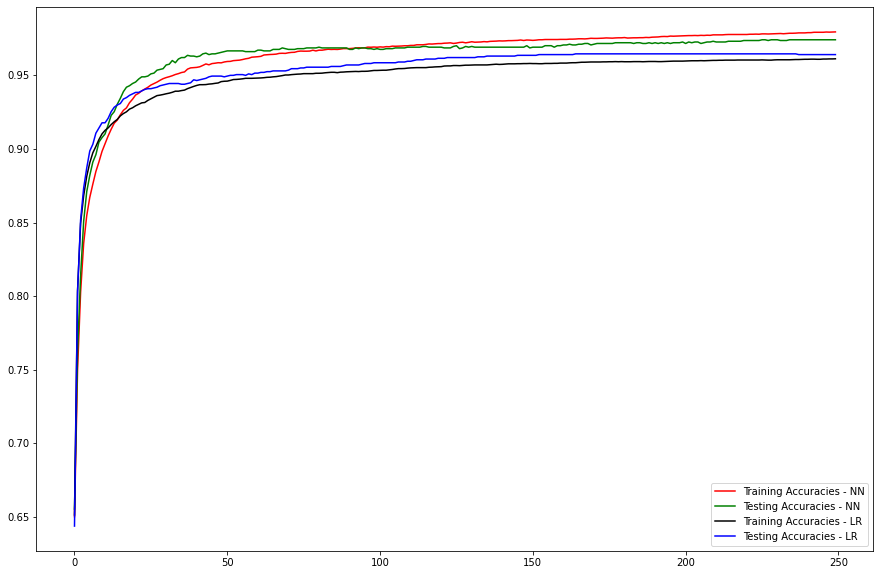

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

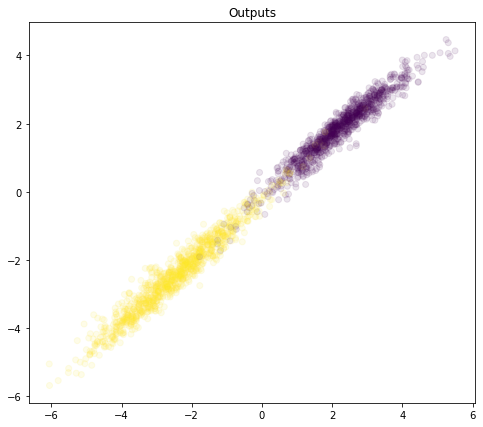

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

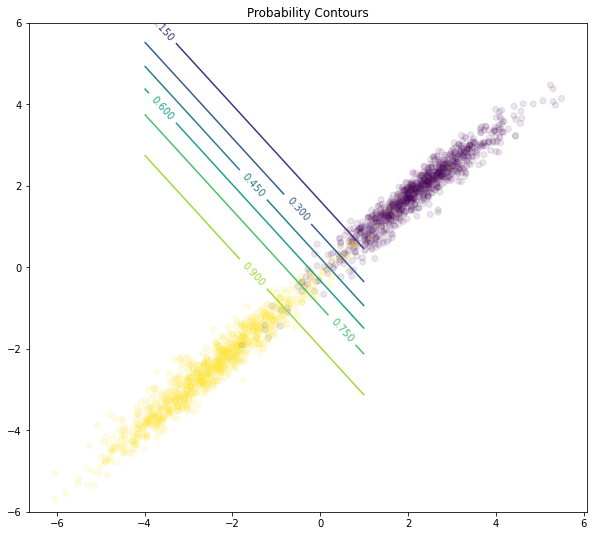

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );